In [2]:
from deepPavlovEval.evaluator import Evaluator

The files were downloaded manually, because I work on Windows  `¯\_(ツ)_/¯`

In [4]:
evaluator = Evaluator(tasks=['paraphraser', 'msrvid', 'xnli', 'rusentiment'])

Cannot find C:\Users\david\YandexDisk\code\NLP\deepPavlovEval\data\Rusentiment\valid.csv file


### Stupid baselines

In [5]:
import numpy as np

class MyRandomEmbedder:
    def __call__(self, batch):
        return np.random.uniform(size=(len(batch), 300))

my_embedder = MyRandomEmbedder()
results_random = evaluator.evaluate(my_embedder, model_name='random_embedder')

Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:00<00:00, 1334.72it/s]
c:\users\david\yandexdisk\code\scikit-learn\sklearn\svm\_base.py:983: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 2999.68it/s]
c:\users\david\yandexdisk\code\scikit-learn\sklearn\svm\_base.py:983: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [6]:
results_random

{'paraphraser': {'f1_best': 0.7502467917077986,
  'accuracy_best': 0.6003159557661928,
  'roc_auc': 0.5076000277373275},
 'msrvid': {'pearson correlation': 0.02738218969120966},
 'xnli': {'f1(clf_knn)': 0.3289066495921835,
  'accuracy(clf_knn)': 0.3385229540918164,
  'f1(clf_svm)': 0.3251171044160763,
  'accuracy(clf_svm)': 0.325748502994012},
 'rusentiment': {'f1(clf_knn)': 0.17661551852571725,
  'accuracy(clf_knn)': 0.3356926188068756,
  'f1(clf_svm)': 0.15882231036806688,
  'accuracy(clf_svm)': 0.4432086282440175}}

```
{'msrvid': {'pearson correlation': -0.03367712116853958},
 'paraphraser': {'accuracy_best': 0.5997893628225381,
  'f1_best': 0.749835418038183,
  'roc_auc': 0.5005397221644361},
 'rusentiment': {'accuracy(clf_knn)': 0.33367037411526795,
  'accuracy(clf_svm)': 0.4368048533872599,
  'f1(clf_knn)': 0.17950732500756778,
  'f1(clf_svm)': 0.16038301601855842},
 'xnli': {'accuracy(clf_knn)': 0.3343313373253493,
  'accuracy(clf_svm)': 0.3277445109780439,
  'f1(clf_knn)': 0.322089939622696,
  'f1(clf_svm)': 0.326212625584307}}
 ```

In [70]:
??HashingVectorizer

In [88]:
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.random_projection import GaussianRandomProjection
from sklearn.pipeline import make_pipeline


class RandomProjectionEmbedder:
    def __init__(self, n_components=300, n_features=1_000):
        self.model = make_pipeline(HashingVectorizer(n_features=n_features), GaussianRandomProjection(n_components=n_components))
        self.model.fit(['привет, как дела'] * 10)
    def __call__(self, batch):
        return self.model.transform([' '.join(toks) for toks in batch])
    

class HashEmbedder:
    def __init__(self, n_features=300):
        self.model = HashingVectorizer(n_features=n_features, analyzer='char', ngram_range=(2,6))
        self.model.fit(['привет, как дела'] * 10)
    def __call__(self, batch):
        return self.model.transform([' '.join(toks) for toks in batch]).todense()

In [93]:
rpe = RandomProjectionEmbedder(n_components=300, n_features=1000)
results_rnd_1k_300 = evaluator.evaluate(rpe, model_name='rand_proj')
results_rnd_1k_300

Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 369.41it/s]


{'paraphraser': {'f1_best': 0.7612994350282485,
  'accuracy_best': 0.6666666666666666,
  'roc_auc': 0.7560999006079099},
 'msrvid': {'pearson correlation': 0.6356991802481946},
 'xnli': {'f1(clf_knn)': 0.3775236147608783,
  'accuracy(clf_knn)': 0.39840319361277443,
  'f1(clf_svm)': 0.4211752465264074,
  'accuracy(clf_svm)': 0.4213572854291417},
 'rusentiment': {'f1(clf_knn)': 0.2866320708061392,
  'accuracy(clf_knn)': 0.4256825075834176,
  'f1(clf_svm)': 0.28752839088410587,
  'accuracy(clf_svm)': 0.47960903269295585}}

In [94]:
# he = HashEmbedder(n_features=300)
# results_he = evaluator.evaluate(he, model_name='hash_emb')
# ValueError: Classification metrics can't handle a mix of binary and multilabel-indicator targets

## Strong baselines

### Laser

In [9]:
from laserembeddings import Laser
laser = Laser()

In [10]:
class LaserEmbedder:
    def __init__(self, model, lang='ru'):
        self.model = model
    def __call__(self, batch):
        return self.model.embed_sentences([' '.join(toks) for toks in batch], lang='ru')

In [11]:
lemb = LaserEmbedder(laser)

In [12]:
results_laser = evaluator.evaluate(lemb, model_name='laser')

Batches: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:06<00:00,  3.57it/s]


In [13]:
results_laser

{'paraphraser': {'f1_best': 0.8009118541033435,
  'accuracy_best': 0.732490784623486,
  'roc_auc': 0.824477035804267},
 'msrvid': {'pearson correlation': 0.7852007776466857},
 'xnli': {'f1(clf_knn)': 0.3876252346738623,
  'accuracy(clf_knn)': 0.4303393213572854,
  'f1(clf_svm)': 0.5789523556062265,
  'accuracy(clf_svm)': 0.578443113772455},
 'rusentiment': {'f1(clf_knn)': 0.3859377663023878,
  'accuracy(clf_knn)': 0.4644421975058982,
  'f1(clf_svm)': 0.5392892893853617,
  'accuracy(clf_svm)': 0.6643073811931244}}

```
{'msrvid': {'pearson correlation': 0.7852007833853631},
 'paraphraser': {'accuracy_best': 0.732490784623486,
  'f1_best': 0.8009118541033435,
  'roc_auc': 0.824477035804267},
 'rusentiment': {'accuracy(clf_knn)': 0.463768115942029,
  'accuracy(clf_svm)': 0.6639703404111897,
  'f1(clf_knn)': 0.3835021078852405,
  'f1(clf_svm)': 0.5396652596949999},
 'xnli': {'accuracy(clf_knn)': 0.4303393213572854,
  'accuracy(clf_svm)': 0.578443113772455,
  'f1(clf_knn)': 0.3876252346738623,
  'f1(clf_svm)': 0.5789523556062265}}
```

### BERT   

In [58]:
import torch

def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0] #First element of model_output contains all token embeddings
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    sum_embeddings = torch.sum(token_embeddings ** 2 * input_mask_expanded, 1)
    sum_mask = torch.clamp(input_mask_expanded.sum([1]), min=1e-9)
    sums = sum_embeddings / sum_mask
    return sums

def tokenize(text, model, tokenizer):
    encoded_input = tokenizer(text, padding=True, truncation=True, max_length=128, return_tensors='pt')
    encoded_input  = {k: v.to(model.device) for k, v in encoded_input.items()}
    return encoded_input

def embed_bert_cls(text, model, tokenizer):
    t = tokenize(text, model, tokenizer)
    with torch.no_grad():
        model_output = model(**t)
    embeddings = model_output.last_hidden_state[:, 0, :]
    embeddings = torch.nn.functional.normalize(embeddings)
    return embeddings[0].cpu().numpy()

def embed_bert_cls2(text, model, tokenizer):
    t = tokenize(text, model, tokenizer)
    
    with torch.no_grad():
        model_output = model(**t)

    embeddings = model_output.pooler_output
    embeddings = torch.nn.functional.normalize(embeddings)
    return embeddings[0].cpu().numpy()

def embed_bert_pool(text, model, tokenizer):
    t = tokenize(text, model, tokenizer)

    with torch.no_grad():
        model_output = model(**t)

    sentence_embeddings = mean_pooling(model_output, t['attention_mask'])
    return sentence_embeddings[0].cpu().numpy()


POOLERS = {
    'mean': embed_bert_pool, 
    'cls': embed_bert_cls, 
    'embed_bert_cls2': embed_bert_cls2
}

In [46]:
class BertEmbedder:
    def __init__(self, model, tokenizer, pooling='mean'):
        self.model = model
        self.tokenizer = tokenizer
        self.pooling = pooling
        self.pooler = POOLERS[self.pooling]
        
    def __call__(self, batch):
        return np.stack([self.pooler(' '.join(toks), model=self.model, tokenizer=self.tokenizer) for toks in batch])

In [22]:
import torch
from transformers import AutoTokenizer, BertModel
m = 'C:/Users/david/Google Диск/models/tinybert-ru'
m = 'cointegrated/rubert-tiny'

tiny_tokenizer = AutoTokenizer.from_pretrained(m)
tiny_bert = BertModel.from_pretrained(m)

In [89]:
tiny_bert.cuda();

In [29]:
tiny_be_mean = BertEmbedder(tiny_bert, tiny_tokenizer, pooling='mean')

In [32]:
tiny_be_mean(['привет', 'как дела']).shape

(2, 312)

In [33]:
results_tiny_mean = evaluator.evaluate(tiny_be_mean, model_name='tiny_bert_mean')

Batches: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:57<00:00,  1.44s/it]
c:\users\david\yandexdisk\code\scikit-learn\sklearn\svm\_base.py:983: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
Batches: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:16<00:00,  1.42it/s]
c:\users\david\yandexdisk\code\scikit-learn\sklearn\svm\_base.py:983: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [36]:
results_tiny_mean

{'paraphraser': {'f1_best': 0.7692307692307694,
  'accuracy_best': 0.6866771985255398,
  'roc_auc': 0.7744758800822875},
 'msrvid': {'pearson correlation': 0.6309384091299389},
 'xnli': {'f1(clf_knn)': 0.3828383319167603,
  'accuracy(clf_knn)': 0.3930139720558882,
  'f1(clf_svm)': 0.4486706762918426,
  'accuracy(clf_svm)': 0.4497005988023952},
 'rusentiment': {'f1(clf_knn)': 0.3159630200452381,
  'accuracy(clf_knn)': 0.4162453656892484,
  'f1(clf_svm)': 0.43189772672789717,
  'accuracy(clf_svm)': 0.49646107178968657}}

```
{'paraphraser': {'f1_best': 0.7692307692307694,
  'accuracy_best': 0.6866771985255398,
  'roc_auc': 0.7744758800822875},
 'msrvid': {'pearson correlation': 0.6309384091299389},
 'xnli': {'f1(clf_knn)': 0.3828383319167603,
  'accuracy(clf_knn)': 0.3930139720558882,
  'f1(clf_svm)': 0.4486706762918426,
  'accuracy(clf_svm)': 0.4497005988023952},
 'rusentiment': {'f1(clf_knn)': 0.3159630200452381,
  'accuracy(clf_knn)': 0.4162453656892484,
  'f1(clf_svm)': 0.43189772672789717,
  'accuracy(clf_svm)': 0.49646107178968657}}
```

In [90]:
tiny_be_cls = BertEmbedder(tiny_bert, tiny_tokenizer, pooling='cls')
results_tiny_cls = evaluator.evaluate(tiny_be_cls, model_name='tiny_bert_cls')
results_tiny_cls

Batches: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:11<00:00,  2.04it/s]


{'paraphraser': {'f1_best': 0.7625489498042007,
  'accuracy_best': 0.6629805160610848,
  'roc_auc': 0.7041178374130318},
 'msrvid': {'pearson correlation': 0.2033127107868492},
 'xnli': {'f1(clf_knn)': 0.43038332279043806,
  'accuracy(clf_knn)': 0.44011976047904194,
  'f1(clf_svm)': 0.5354242054153777,
  'accuracy(clf_svm)': 0.5351297405189621},
 'rusentiment': {'f1(clf_knn)': 0.2960205577709156,
  'accuracy(clf_knn)': 0.41523424334344455,
  'f1(clf_svm)': 0.34161389245064144,
  'accuracy(clf_svm)': 0.5342096393663633}}

#### RuBERT

In [53]:
m = 'DeepPavlov/rubert-base-cased-sentence'

rubert_tokenizer = AutoTokenizer.from_pretrained(m)
rubert = BertModel.from_pretrained(m)

In [54]:
rubert.cuda();

In [59]:
rubert_mean = BertEmbedder(rubert, rubert_tokenizer, pooling='mean')

In [60]:
results_rubert_mean = evaluator.evaluate(rubert_mean, model_name='rubert_mean')

Batches: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [02:03<00:00,  3.09s/it]
c:\users\david\yandexdisk\code\scikit-learn\sklearn\svm\_base.py:983: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
Batches: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:37<00:00,  1.57s/it]
c:\users\david\yandexdisk\code\scikit-learn\sklearn\svm\_base.py:983: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [62]:
results_rubert_mean

{'paraphraser': {'f1_best': 0.8087091757387248,
  'accuracy_best': 0.7546076882569773,
  'roc_auc': 0.8327785867831634},
 'msrvid': {'pearson correlation': 0.8123742768479439},
 'xnli': {'f1(clf_knn)': 0.5428126989911436,
  'accuracy(clf_knn)': 0.5580838323353293,
  'f1(clf_svm)': 0.4794422206259023,
  'accuracy(clf_svm)': 0.47964071856287427},
 'rusentiment': {'f1(clf_knn)': 0.39051504233496886,
  'accuracy(clf_knn)': 0.46006066734074824,
  'f1(clf_svm)': 0.4477059525826297,
  'accuracy(clf_svm)': 0.5321873946747556}}

In [92]:
rubert_cls = BertEmbedder(rubert, rubert_tokenizer, pooling='cls')
results_rubert_cls = evaluator.evaluate(rubert_mean, model_name='rubert_cls')
results_rubert_cls

Batches: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [02:01<00:00,  3.05s/it]
c:\users\david\yandexdisk\code\scikit-learn\sklearn\svm\_base.py:983: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
Batches: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:36<00:00,  1.54s/it]
c:\users\david\yandexdisk\code\scikit-learn\sklearn\svm\_base.py:983: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


{'paraphraser': {'f1_best': 0.8087091757387248,
  'accuracy_best': 0.7546076882569773,
  'roc_auc': 0.8327785867831634},
 'msrvid': {'pearson correlation': 0.8123742768479439},
 'xnli': {'f1(clf_knn)': 0.5428126989911436,
  'accuracy(clf_knn)': 0.5580838323353293,
  'f1(clf_svm)': 0.4818714741034496,
  'accuracy(clf_svm)': 0.4818363273453094},
 'rusentiment': {'f1(clf_knn)': 0.39051504233496886,
  'accuracy(clf_knn)': 0.46006066734074824,
  'f1(clf_svm)': 0.44205428019048076,
  'accuracy(clf_svm)': 0.5028648466464443}}

# images

Судя по этим картинкам, соотношение между моделями примерно такое:
* На задаче детекции парафраз, маленький BERT заметно хуже большого (0.77 ROC AUC < 0.83)
* На задаче semantic text similarity, маленький BERT совсем отстоен (0.63 pearson << 0.81)
* На задаче NLI, маленький BERT заметно лучше большого (точность 0.53 > 0.48)
* На задаче детекции сентимента, маленький BERT сопоставим с большим (точность 0.534 = 0.532). Впрочем, обе модели сильно хуже, чем LASER. 

In [102]:
for res in evaluator.all_results:
    if res['task'] == 'rusentiment' and res['model'] in ['tiny_bert_mean', 'rubert_mean', 'tiny_bert_cls', 'rubert_cls']:
        print(res)

{'task': 'rusentiment', 'model': 'tiny_bert_mean', 'metrics': {'f1(clf_knn)': 0.3159630200452381, 'accuracy(clf_knn)': 0.4162453656892484, 'f1(clf_svm)': 0.43189772672789717, 'accuracy(clf_svm)': 0.49646107178968657}}
{'task': 'rusentiment', 'model': 'rubert_mean', 'metrics': {'f1(clf_knn)': 0.39051504233496886, 'accuracy(clf_knn)': 0.46006066734074824, 'f1(clf_svm)': 0.4477059525826297, 'accuracy(clf_svm)': 0.5321873946747556}}
{'task': 'rusentiment', 'model': 'tiny_bert_cls', 'metrics': {'f1(clf_knn)': 0.2960205577709156, 'accuracy(clf_knn)': 0.41523424334344455, 'f1(clf_svm)': 0.34161389245064144, 'accuracy(clf_svm)': 0.5342096393663633}}
{'task': 'rusentiment', 'model': 'rubert_cls', 'metrics': {'f1(clf_knn)': 0.39051504233496886, 'accuracy(clf_knn)': 0.46006066734074824, 'f1(clf_svm)': 0.44205428019048076, 'accuracy(clf_svm)': 0.5028648466464443}}


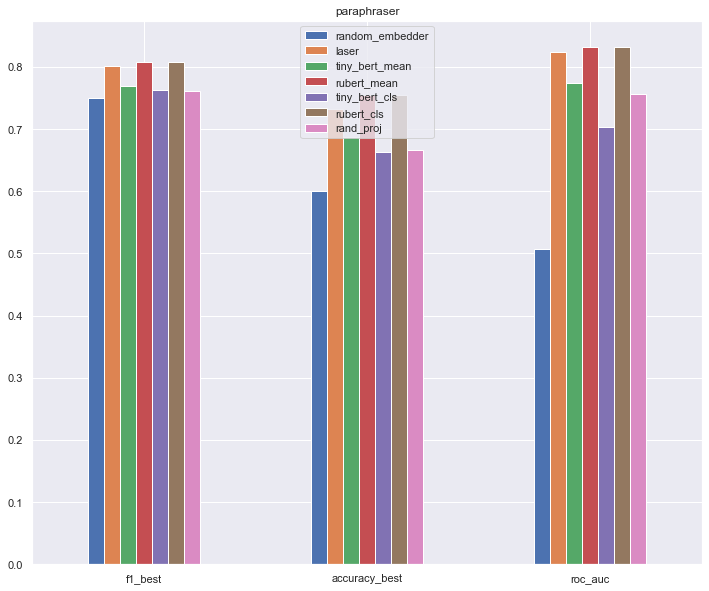

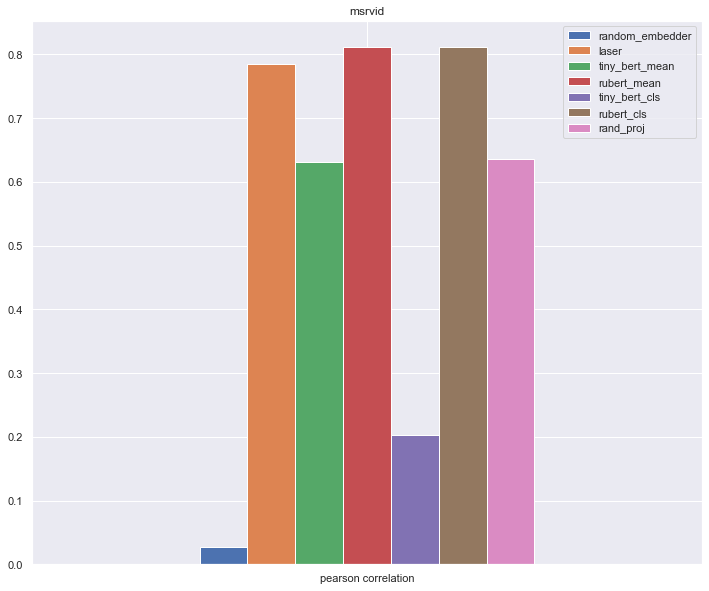

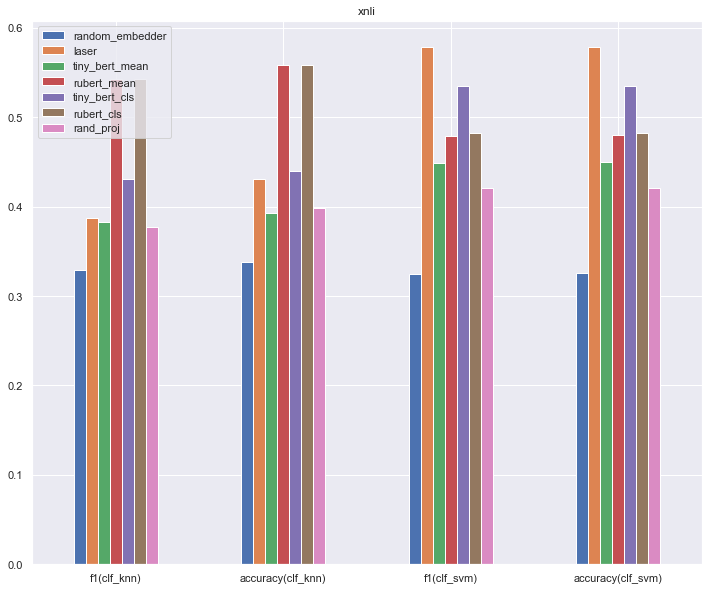

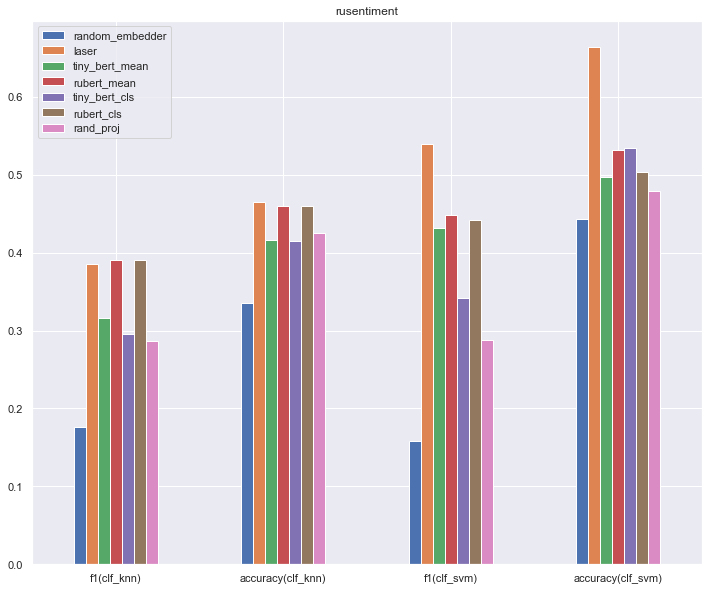

In [96]:
evaluator.plot_results(save=True, show=True, kind='bar', rot=0)